In [77]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('/content/Dataset.csv', delimiter=',')

In [78]:
class kernel:

    def __init__(self, sigma = 1, d = 2):
        self.sigma = sigma
        self.d = d

    def polynomial(self, x, y):
        """
        Equation: k(x, y) = (1 + x.T * y)^d
        Hyperparameter: d
        """
        return (1 + (x.T@y))**self.d

    def exp(self, x, y):
        """
        Equation: k(x, y) = exp(- ||x-y|| / (2 * sigma^2))
        Hyperparameter: sigma
        """
        return np.exp(- (1/ (2*self.sigma**2)) * (np.linalg.norm(x-y))**2)


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class KPCA:
    def __init__(self, X, kernel, d):
        """
        Kernel PCA

        Params:
            X: dxn matrix
            kernel: kernel function
            d: number of principal components to be chosen
        """
        self.X = X
        self.kernel = kernel 
        self.d = d
    
    def _chk_pos_semidef(self, x):
        return np.all(x >= 0)

    def __kernel_matrix(self):
        """
        Compute kernel matrix

        Output:
            K: nxn matrix
        """
        K = []
        r, c = self.X.shape
        for fil in range(c):
            k_aux = []
            for col in range(c):
                k_aux.append(self.kernel(self.X[:, fil], self.X[:, col]))
            K.append(k_aux)
        K = np.array(K)
        # Centering K
        ones = np.ones(K.shape)/c
        K = K - ones@K - K@ones + ones@K@ones
        return K
    
    def __eig_decompK(self):
        """
        Decomposition of K

        Output: 
            eig_val_vec: List of tuples ordered by Eigen_values; (eigen_value, eigenvector)
        """
        self.K = self.__kernel_matrix()
        eigval, eigvec = np.linalg.eig(self.K)
        if not self._chk_pos_semidef(eigval):
            print("The Matrix is not Positive Semidefinite")
        # Normalize eigenvectors and compute singular values of K
        eig_val_vec = [(np.sqrt(eigval[i]), eigvec[:,i]/np.sqrt(eigval[i]) ) for i in range(len(eigval))]
        eig_val_vec.sort(key=lambda x: x[0], reverse=True)
        return eig_val_vec
    
    def project(self):
        """
        Compute scores

        Output:
            scores: T = sigma * (V_d).T
        """
        self.eig_val_vec = self.__eig_decompK()
        eig_val_vec_dim = self.eig_val_vec[:self.d]
        self.sigma = np.diag([i[0] for i in eig_val_vec_dim])
        self.v = np.array([list(j[1]) for j in eig_val_vec_dim]).T
        self.sigma = np.real_if_close(self.sigma, tol=1)
        self.v = np.real_if_close(self.v, tol=1)
        self.scores = self.sigma @ self.v.T
        return self.scores
    
    def plot_singular_values(self, grid = True):
        eig_plot = [np.real_if_close(e, tol=1) for (e, _) in self.eig_val_vec if e > 0.01]
        plt.style.use('seaborn-whitegrid')
        # fig = plt.figure(figsize=(10,5.5))
        fig = plt.figure()
        plt.plot(list(range(1, len(eig_plot) + 1)), eig_plot)
        plt.grid(grid)
        plt.title('Singular Values of Marix other than zero(0)')
        plt.ylabel('$\sigma^2$')
        plt.show()
        
    def plot_scores(self, grid = True, dim_1 = 1, dim_2 = 2):
        if self.d < 2:
            print("Not enough principal components")
            return
        
        plt.style.use('seaborn-whitegrid')
        # fig = plt.figure(figsize=(10,5.5))
        fig = plt.figure()
        plt.axhline(c = 'black', alpha = 0.2)
        plt.axvline(c = 'black', alpha = 0.2)
        plt.scatter(self.scores[dim_1 - 1,:], self.scores[dim_2 - 1,:], c = 'blue')
        plt.grid(grid)
        plt.title('KPCA Space')
        plt.xlabel('${}^a$ Principal Component of $\phi(X)$'.format(dim_1))
        plt.ylabel('${}^a$ Principal Component of $\phi(X)$'.format(dim_2))
        plt.show()
        

In [80]:
# data = data.T

# Polynomial

2
The Matrix is not Positive Semidefinite


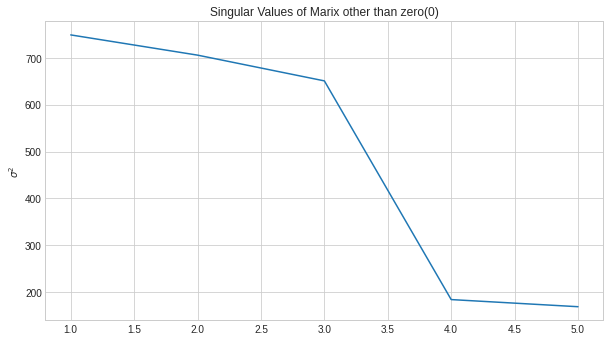

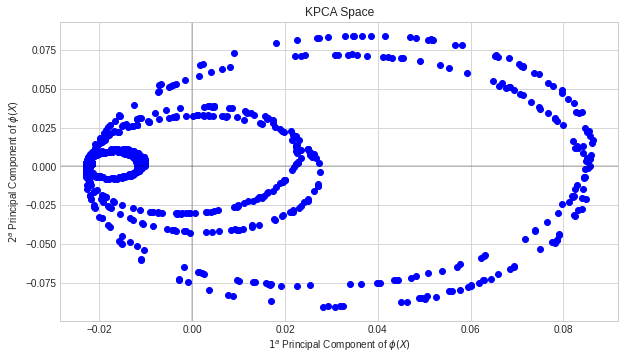

3
The Matrix is not Positive Semidefinite


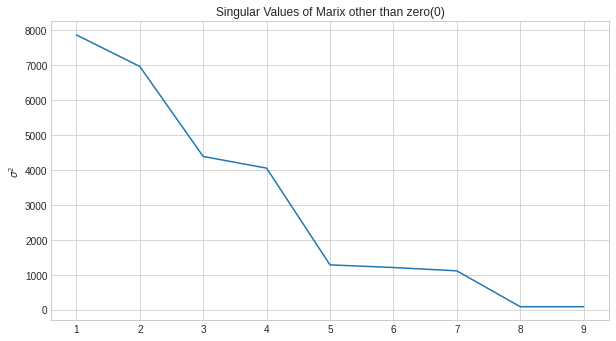

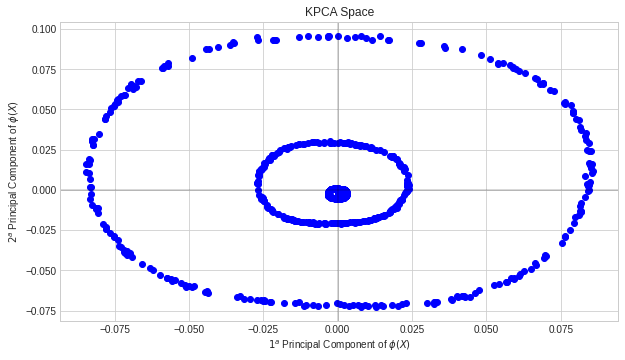

In [88]:
for i in range(2, 4):
  print(i)
  X = data.T
  K = kernel(d = i).polynomial
  k = 2
  kpca = KPCA(X, K, k)
  scores = kpca.project()
  kpca.plot_singular_values(grid = True)
  kpca.plot_scores(grid = True, dim_1 = 1, dim_2 = 2)

# Exponential (Gaussian)

0.1


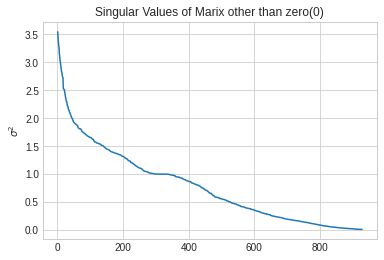

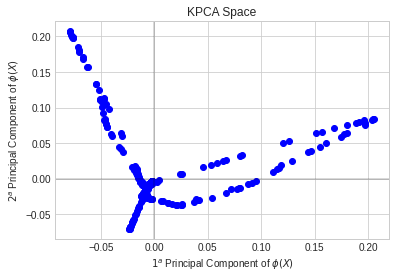

0.2
The Matrix is not Positive Semidefinite


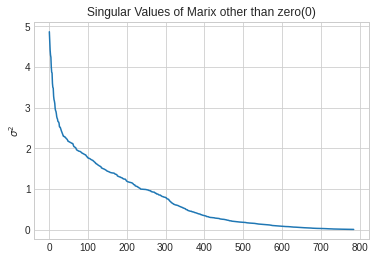

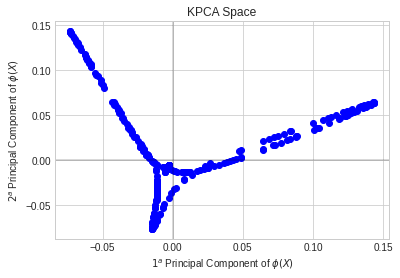

0.3
The Matrix is not Positive Semidefinite


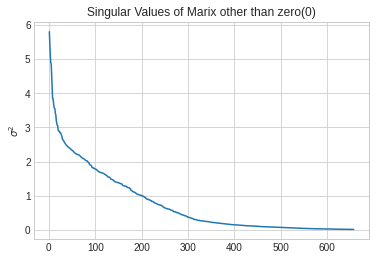

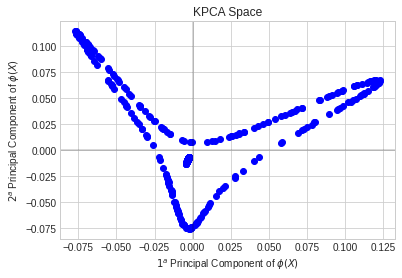

0.4
The Matrix is not Positive Semidefinite


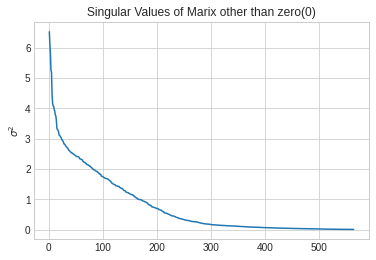

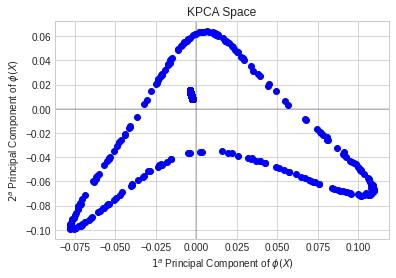

0.5
The Matrix is not Positive Semidefinite


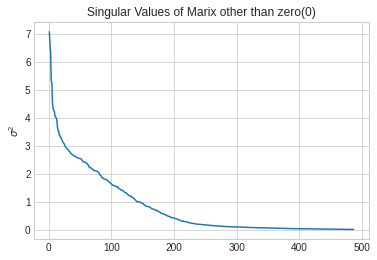

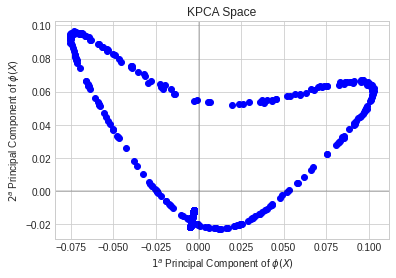

0.6
The Matrix is not Positive Semidefinite


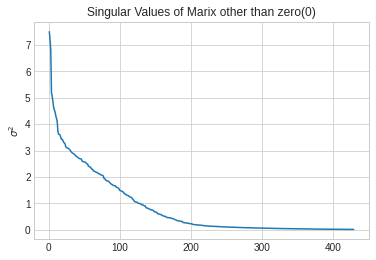

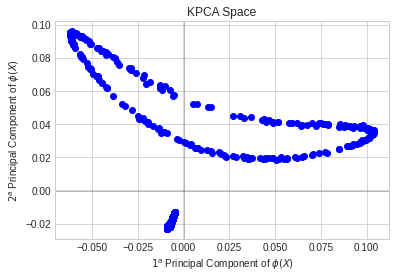

0.7
The Matrix is not Positive Semidefinite


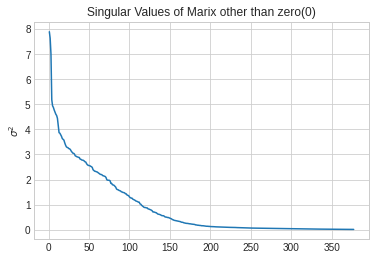

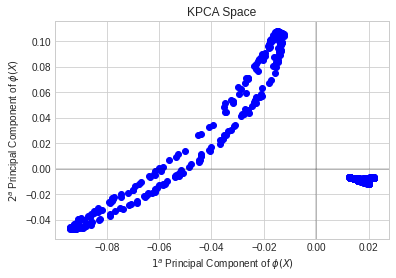

0.8
The Matrix is not Positive Semidefinite


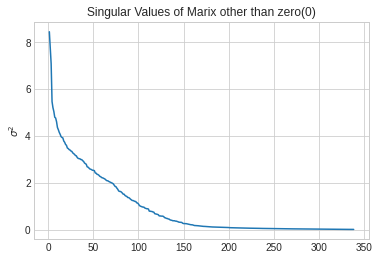

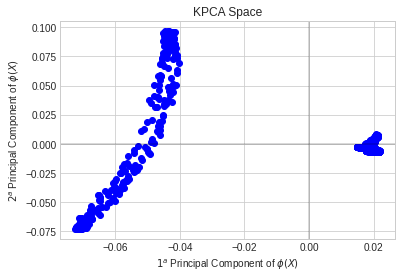

0.9
The Matrix is not Positive Semidefinite


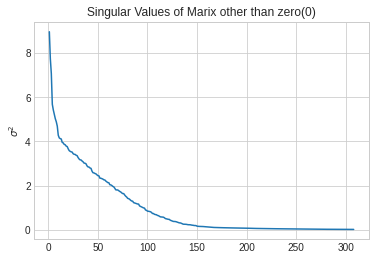

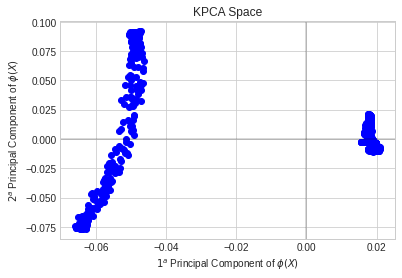

1.0
The Matrix is not Positive Semidefinite


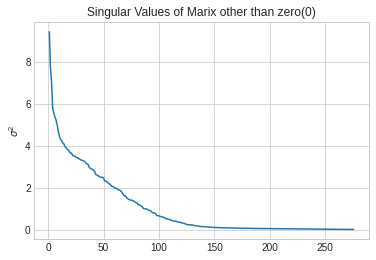

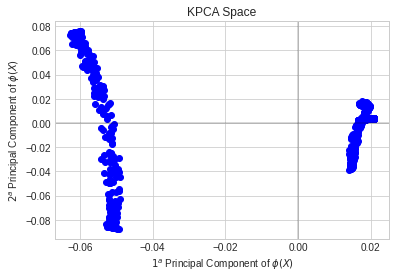

In [92]:
for i in range(1, 11):
  i = i / 10
  print(i)
  X = data.T
  K = kernel(sigma = i).exp # Kernel
  k = 2 # Number of PCA Components
  kpca = KPCA(X, K, k)
  scores = kpca.project()
  kpca.plot_singular_values(grid = True)
  kpca.plot_scores(grid = True, dim_1 = 1, dim_2 = 2)

In [73]:
X = data.T
K = kernel(d = 2, sigma=0.1).exp # Kernel
k = 2 # Number of PCA Components
kpca = KPCA(X, K, k)
scores = kpca.project()

In [82]:
T = kpca.scores # Matrix of scores
K = kpca.K # Kernel matrix
V = kpca.v # Matrix of eigenvectors
S = kpca.sigma # Diagonal matrix of (real) eigen values

print("Shape of Matrix of Scores", T.shape)
print("Shape of Kernel Matrix", K.shape)
print("Shape of Matrix of Eigen Vector", V.shape)
print("Shape of Diagonal Matrix", S.shape)


Shape of Matrix of Scores (2, 1000)
Shape of Kernel Matrix (1000, 1000)
Shape of Matrix of Eigen Vector (1000, 2)
Shape of Diagonal Matrix (2, 2)


In [ ]:
kpca.plot_singular_values(grid = True)

In [ ]:
kpca.plot_scores(grid = True, dim_1 = 1, dim_2 = 2)

In [10]:
# kpca.plot_scores_3d(dim_1 = 1, dim_2 = 2, dim_3 = 3)

# TESTING

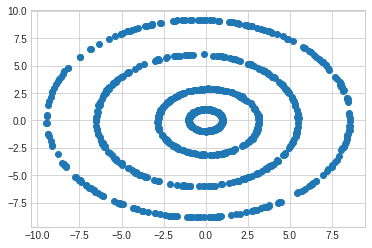

In [28]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('/content/Dataset.csv', delimiter=',')
plt.scatter(data[:,0], data[:,1])

In [49]:
def get_kernel(gamma):
    def kernel(x, y):
        d = 2
        return np.exp(-gamma*( (x[0]-y[0])**2 + (x[1]-y[1])**2 ))
        # return (1 + (x@y))**d
    return kernel

In [50]:
def kpca(data, kernel):
    N = len(data)
    K = np.zeros(shape=(N,N))

    for n0, m0 in enumerate(data):
        for n1, m1 in enumerate(data):
            K[n0,n1] = kernel(m0,m1)
    one_n = np.ones(shape=(N,N)) / N
    X = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    eigvals, eigvecs = np.linalg.eigh(X)
    
    def comp(x, i):
        result = 0
        for n in range(N):
            result += eigvecs[n,-i] * kernel(x, data[n])
        return result / np.sqrt(eigvals[-i]*N)
    
    return comp


In [51]:
comp = kpca(data, get_kernel(10.0))

In [52]:
print(comp([0,1],1))

-0.0021289139965631507


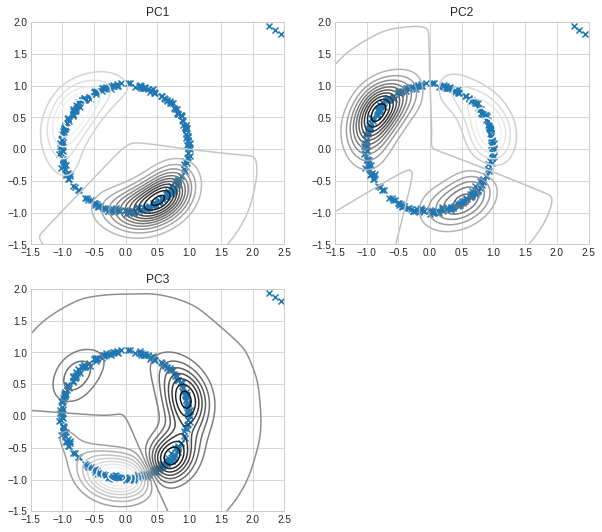

In [53]:
x = np.linspace(-1.5,2.5,1000)
y = np.linspace(-1.5,2,1000)
X, Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(10,9))
for i in range(1,4):
    subplot = fig.add_subplot(2,2,i)
    subplot.set_xlim(-1.5,2.5)
    subplot.set_ylim(-1.5,2)
    subplot.set_title('PC%d' % i)
    Z = [comp([x,y], i) for (x,y) in zip(X,Y)]
    subplot.contour(X, Y, Z, 20)
    # subplot.scatter(data[labels==0, 0], data[labels==0,1], marker='x')
    # subplot.scatter(data[labels==1, 0], data[labels==1,1], marker='o')
    subplot.scatter(data[:, 0], data[:,1], marker='x')
